<a href="https://colab.research.google.com/github/majithecoder/Python-Portfolio/blob/main/twitter_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#description :  sentiment analysis project


In [51]:
#import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 



In [22]:
#load the data
from google.colab import files
uploaded=files.upload()

Saving login.csv to login (1).csv


In [35]:
#get the data
log=pd.read_csv('login.csv')


In [36]:
#twitter API credentials 
#consumerKey =log['key'][0]
#consumerSecret=log['key'][1]
#accessToken=log['key'][2]
#accessTokenSecret=log['key'][3]

consumer_key="TKhmmyLYixGPbLIilsGZa13Rp"
consumer_secret="MyioBbyK8naWEJMnBxBuvQW4s8zUUL9xIeAQUAHbDGDNJvuRXP"
access_token="1341654768087777282-nOMS0kq49boITGqTERYUi4160r1zA4"
access_token_secret="XohwvP5VMIf73N78npTYmZL1LcImrczBaIMLO4lWSfjGn"





In [37]:
#set the auth object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

#set the access token and access token secret
auth.set_access_token(access_token, access_token_secret)

#create API object while passing in the auth info
api= tweepy.API(auth)




In [38]:
#extarct tweets from the twitter user
posts = api.user_timeline(screen_name="NarendraModi", count=100, lang="en", tweet_mode="extended" )
#cursor = tweepy.Cursor{api.user_timeline, id='realDonaldTrump',tweet_mode='extended'}.items(1)

#print  tweets from the account
print ("show the 5 recent tweets: \n")
i=1
for tweet in posts [0:5]:
  print(str(i) + ') '+ tweet.full_text+'\n')
  i= i+1


show the 5 recent tweets: 

1) Reforms by Conviction and Incentives...my @LinkedIn  post on innovative policy making in the time of COVID-19, powered by the spirit of Centre-State Bhagidari. https://t.co/ac0jhAqluT

2) Today’s record-breaking vaccination numbers are gladdening. The vaccine remains our strongest weapon to fight COVID-19. Congratulations to those who got vaccinated and kudos to all the front-line warriors working hard to ensure so many citizens got the vaccine. 

Well done India!

3) The world is realising the benefits and the uniting potential of Yoga.

I thank @PMBhutan for his constant passion towards Yoga and support for #YogaDay. https://t.co/aS2OufPMtS

4) Happy to see. Best wishes to Yuvan. https://t.co/JoutlFz5Nv

5) Very good. https://t.co/xzUKvBcFSq



In [39]:
#create a dataframe with a column called tweets 
df= pd.DataFrame ([tweet.full_text for tweet in posts] ,columns=['Tweets'])

#show the first 5 rows of data 
df.head()


,Tweets
0,Reforms by Conviction and Incentives...my @Lin...
1,Today’s record-breaking vaccination numbers ar...
2,The world is realising the benefits and the un...
3,Happy to see. Best wishes to Yuvan. https://t....
4,Very good. https://t.co/xzUKvBcFSq


In [74]:
#create a function to clean the tweets 
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removed @mentions
  text = re.sub(r'#','',text) #removing the # symbol
  text = re.sub (r'RT[\s]+' , '' , text)  #removing RT
  text = re.sub (r'https?:\/\/\S+' ,'' , text)  #remove the hyper link 

  return text 

#text cleaning 
df['Tweets']= df['Tweets'].apply(cleanTxt)

#print the cleaned txt
df 



  





,Tweets
0,Reforms by Conviction and Incentives...my po...
1,Today’s record-breaking vaccination numbers ar...
2,The world is realising the benefits and the un...
3,Happy to see. Best wishes to Yuvan.
4,Very good.
...,...
95,कोरोना के खिलाफ लड़ाई में बहुत बड़ी भूमिका देश...
96,At a time when everybody wants to run away fro...
97,Our Nari Shakti is at the forefront of helping...
98,"Group Captain Patnaik, like several other coll..."


In [76]:
#subjectivity test
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#poltarity check
def getPolarity(text):
 return TextBlob(text).sentiment.polarity

 #creating  two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df ['Tweets'].apply(getPolarity)

 # print dataframes with new column
df 

,Tweets,Subjectivity,Polarity
0,Reforms by Conviction and Incentives...my po...,1.000000,0.500000
1,Today’s record-breaking vaccination numbers ar...,0.520833,0.166667
2,The world is realising the benefits and the un...,0.666667,0.000000
3,Happy to see. Best wishes to Yuvan.,0.650000,0.900000
4,Very good.,0.780000,0.910000
...,...,...,...
95,कोरोना के खिलाफ लड़ाई में बहुत बड़ी भूमिका देश...,0.000000,0.000000
96,At a time when everybody wants to run away fro...,0.083333,0.100000
97,Our Nari Shakti is at the forefront of helping...,0.473214,0.116071
98,"Group Captain Patnaik, like several other coll...",0.306944,0.129167


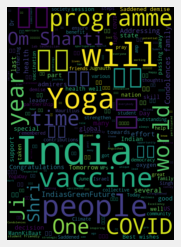

In [77]:
#word cloud

allWords = ''.join([twts for twts in df ['Tweets']])
wordcloud = WordCloud(width = 500,  height=700 , random_state = 21 , max_font_size = 119).generate(allWords) 

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()



In [78]:
#tweet negative and postive analysis
def getAnalysis(score):
 if score < 0 : 
   return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Postive'

df['Analysis'] = df['Polarity'].apply(getAnalysis) 

   #print the dataframe
df





,Tweets,Subjectivity,Polarity,Analysis
0,Reforms by Conviction and Incentives...my po...,1.000000,0.500000,Postive
1,Today’s record-breaking vaccination numbers ar...,0.520833,0.166667,Postive
2,The world is realising the benefits and the un...,0.666667,0.000000,Neutral
3,Happy to see. Best wishes to Yuvan.,0.650000,0.900000,Postive
4,Very good.,0.780000,0.910000,Postive
...,...,...,...,...
95,कोरोना के खिलाफ लड़ाई में बहुत बड़ी भूमिका देश...,0.000000,0.000000,Neutral
96,At a time when everybody wants to run away fro...,0.083333,0.100000,Postive
97,Our Nari Shakti is at the forefront of helping...,0.473214,0.116071,Postive
98,"Group Captain Patnaik, like several other coll...",0.306944,0.129167,Postive


In [82]:
#positive tweets 
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range (0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Postive'):
    print( str(j)+')' +sortedDF ['Tweets'][i])
    print()
    j=j+1

 

1)Reforms by Conviction and Incentives...my   post on innovative policy making in the time of COVID-19, powered by the spirit of Centre-State Bhagidari. 

2)Today’s record-breaking vaccination numbers are gladdening. The vaccine remains our strongest weapon to fight COVID-19. Congratulations to those who got vaccinated and kudos to all the front-line warriors working hard to ensure so many citizens got the vaccine. 

Well done India!

3)Happy to see. Best wishes to Yuvan. 

4)Very good. 

5)Indians Missions across the world have marked YogaDay with great enthusiasm. The Yoga sessions world over drew several people. 

6)Yoga…always connecting people and inspiring them to lead healthy lives. 

7)भारत का उपहार है, योग रोग पर प्रहार है…

A musical tribute to Yoga...a unique effort by prominent artistes. 

8)Congratulations to His Excellency Ebrahim Raisi on his election as President of the Islamic Republic of Iran. I look forward to working with him to further strengthen the warm ties betw

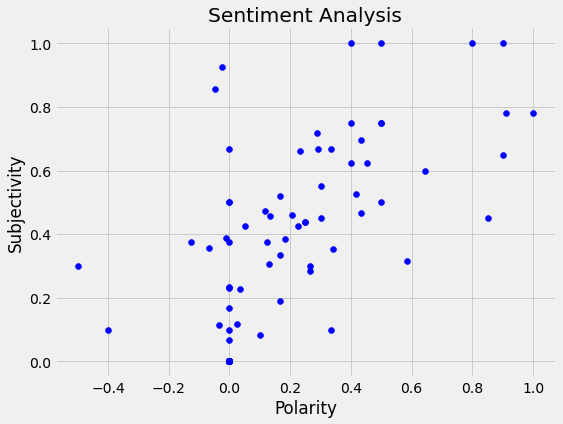

In [87]:
#ploting polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range (0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue' )

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()



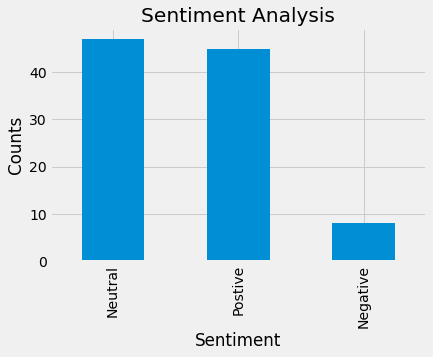

In [89]:
#print value count
df['Analysis'].value_counts()

#plot the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

